In [1]:
# import librarys
import pandas as pd
import glob
import os
import numpy as np
import re
import matplotlib.pyplot as plt 
import matplotlib as mpl
import datetime as dt
import scipy.stats
import timeit
#print(plt.style.available)
# optional: for ggplot-like style
mpl.style.use(['ggplot']) 
# damit plt.show() nicht benötigt wird
%matplotlib inline

In [2]:
path_data_poc = r'./data/message_data_combined.csv'
df_poc = pd.read_csv(path_data_poc, parse_dates=['created'], index_col='created', low_memory=False)
print(df_poc['deviceId'].value_counts())
df_poc.sort_index(ascending=True, inplace=True)
df_poc

2203AAB    27409
1F25047     2764
2203ACB      752
2203AFA      626
1F2504E      595
2203AF9      201
Name: deviceId, dtype: int64


,Unnamed: 0,_id,timestamp,type,seqNumber,deviceId,__v,action,battery,dl_with_timestamp,...,y_fin,y_max,y_min,z_fin,z_max,z_min,isAlarm,isDismissed,counter,resetDetail
created,,,,,,,,,,,,,,,,,,,,,
2021-03-11 19:41:18.369000+00:00,200,604a725e362d421c28ff3e6f,1615491677,data_bidir,20.0,2203ACB,0,double_press,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.0,NaN
2021-03-11 19:44:08.382000+00:00,199,604a73085486724650bc3a20,1615491846,data_bidir,24.0,2203ACB,0,short_press,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.0,NaN
2021-03-11 19:44:16.283000+00:00,198,604a73105486724650bc3a2b,1615491855,data_bidir,25.0,2203ACB,0,long_press,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.0,NaN
2021-03-11 19:45:37.900000+00:00,196,604a73615486724650bc3b75,1615491936,data_bidir,27.0,2203ACB,0,extra_long_press,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.0,NaN
2021-03-11 19:46:08.718000+00:00,197,604a73805486724650bc3c23,1615491936,service_ack,NaN,2203ACB,0,device_setting_confirmed,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30 23:06:55.354000+00:00,0,608c8d8f1542567911038e7b,1619824014,data_bidir,985.0,2203AAB,0,heartbeat_2,2.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
2021-04-30 23:16:12.445000+00:00,1,608c8fbcc38a49214a7cf304,1619824571,data_bidir,658.0,2203AFA,0,reed_counter,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281.0,NaN
2021-04-30 23:21:41.977000+00:00,0,608c9105c38a49214a7d0abb,1619824901,data_bidir,659.0,2203AFA,0,reed_counter,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,282.0,NaN


### Zeitraum eingrenzen

In [3]:
df_poc.sort_index(inplace=True)
df_poc = df_poc['2021-03-26':'2021-04-20']
df_poc

,Unnamed: 0,_id,timestamp,type,seqNumber,deviceId,__v,action,battery,dl_with_timestamp,...,y_fin,y_max,y_min,z_fin,z_max,z_min,isAlarm,isDismissed,counter,resetDetail
created,,,,,,,,,,,,,,,,,,,,,
2021-03-26 00:06:21.779000+00:00,70,605d257d6a04932602b9dacb,1616717162,data_bidir,113.0,2203AFA,0,heartbeat_1,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-26 00:50:20.375000+00:00,374,605d2fccb016c47ea6900e08,1616719819,data_bidir,651.0,1F25047,0,first_move,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2021-03-26 00:51:05.976000+00:00,373,605d2ff96a04932602ba6241,1616719865,data_bidir,652.0,1F25047,0,end_of_orientation_alarm,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2021-03-26 00:51:14.021000+00:00,372,605d30026a04932602ba628c,1616719873,data_bidir,653.0,1F25047,0,orientation_alarm,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2021-03-26 00:52:07.301000+00:00,371,605d3037b016c47ea69012e4,1616719924,data_bidir,654.0,1F25047,0,orientation_changed,0.0,0,...,432.0,544.0,416.0,16.0,144.0,-96.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-20 20:22:12.135000+00:00,864,607f37f4ebb7b50cca377bae,1618950126,data_bidir,2110.0,1F25047,0,heartbeat_1,2.9,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2021-04-20 20:30:04.757000+00:00,47,607f39ccebb7b50cca378fad,1618950603,data_bidir,178.0,2203AF9,0,heartbeat_1,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2021-04-20 20:37:56.017000+00:00,318,607f3ba4597bf23ba4fc86aa,1618951074,data_bidir,324.0,1F2504E,0,heartbeat_1,2.9,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### Sensor ID eingrenzen

In [4]:
df_poc_AAB = df_poc[df_poc['deviceId'] == '2203AAB']
df_poc_AAB = df_poc[df_poc['action'] == 'reed_counter']
df_poc_AAB = df_poc_AAB[['counter']]
df_poc_AAB

,counter
created,
2021-03-26 06:01:41.231000+00:00,78.0
2021-03-26 08:49:16.330000+00:00,79.0
2021-03-26 09:14:34.020000+00:00,80.0
2021-03-26 09:24:51.390000+00:00,81.0
2021-03-26 10:00:13.393000+00:00,82.0
...,...
2021-04-20 18:17:14.606000+00:00,1037.0
2021-04-20 18:17:23.276000+00:00,1037.0
2021-04-20 18:17:23.276000+00:00,1037.0


### Resample Day

In [5]:
df_poc_AAB = df_poc_AAB.resample('D').max()
df_poc_AAB

,counter
created,
2021-03-26 00:00:00+00:00,138.0
2021-03-27 00:00:00+00:00,166.0
2021-03-28 00:00:00+00:00,217.0
2021-03-29 00:00:00+00:00,263.0
2021-03-30 00:00:00+00:00,307.0
2021-03-31 00:00:00+00:00,355.0
2021-04-01 00:00:00+00:00,402.0
2021-04-02 00:00:00+00:00,423.0
2021-04-03 00:00:00+00:00,433.0


### Differenz Tag

In [6]:
df_poc_AAB_day = df_poc_AAB.diff()
df_poc_AAB_day['day'] = df_poc_AAB_day.index.day_name()
df_poc_AAB_day

,counter,day
created,,
2021-03-26 00:00:00+00:00,NaN,Friday
2021-03-27 00:00:00+00:00,28.0,Saturday
2021-03-28 00:00:00+00:00,51.0,Sunday
2021-03-29 00:00:00+00:00,46.0,Monday
2021-03-30 00:00:00+00:00,44.0,Tuesday
2021-03-31 00:00:00+00:00,48.0,Wednesday
2021-04-01 00:00:00+00:00,47.0,Thursday
2021-04-02 00:00:00+00:00,21.0,Friday
2021-04-03 00:00:00+00:00,10.0,Saturday


In [7]:
df_poc_AAB_day.index.day_name()

Index(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday'],
      dtype='object', name='created')

In [8]:
#df_poc_AAB_day[(df_poc_AAB_day.index.day_name() != 'Saturday') & (df_poc_AAB_day.index.day_name() != 'Sunday')] 

In [9]:
df_poc_AAB_day_week = df_poc_AAB_day[(df_poc_AAB_day['day'] != 'Saturday') & (df_poc_AAB_day['day'] != 'Sunday')]
df_poc_AAB_day_week = df_poc_AAB_day_week.fillna(df_poc_AAB_day_week.mean())
df_poc_AAB_day_week

,counter,day
created,,
2021-03-26 00:00:00+00:00,40.882353,Friday
2021-03-29 00:00:00+00:00,46.000000,Monday
2021-03-30 00:00:00+00:00,44.000000,Tuesday
2021-03-31 00:00:00+00:00,48.000000,Wednesday
2021-04-01 00:00:00+00:00,47.000000,Thursday
2021-04-02 00:00:00+00:00,21.000000,Friday
2021-04-05 00:00:00+00:00,10.000000,Monday
2021-04-06 00:00:00+00:00,42.000000,Tuesday
2021-04-07 00:00:00+00:00,22.000000,Wednesday


In [10]:
df_poc_AAB_day_weekend = df_poc_AAB_day[(df_poc_AAB_day['day'] == 'Saturday') | (df_poc_AAB_day['day'] == 'Sunday')]
df_poc_AAB_day_weekend = df_poc_AAB_day_weekend.fillna(df_poc_AAB_day_weekend.mean())
df_poc_AAB_day_weekend

,counter,day
created,,
2021-03-27 00:00:00+00:00,28.0,Saturday
2021-03-28 00:00:00+00:00,51.0,Sunday
2021-04-03 00:00:00+00:00,10.0,Saturday
2021-04-04 00:00:00+00:00,14.0,Sunday
2021-04-10 00:00:00+00:00,30.0,Saturday
2021-04-11 00:00:00+00:00,25.0,Sunday
2021-04-17 00:00:00+00:00,27.0,Saturday
2021-04-18 00:00:00+00:00,19.0,Sunday


In [11]:
df_poc_AAB_day_week = df_poc_AAB_day_week.sort_values('counter')
df_poc_AAB_day_week['counter']

created
2021-04-05 00:00:00+00:00    10.000000
2021-04-16 00:00:00+00:00    21.000000
2021-04-02 00:00:00+00:00    21.000000
2021-04-07 00:00:00+00:00    22.000000
2021-04-19 00:00:00+00:00    28.000000
2021-04-13 00:00:00+00:00    32.000000
2021-04-20 00:00:00+00:00    33.000000
2021-04-12 00:00:00+00:00    40.000000
2021-03-26 00:00:00+00:00    40.882353
2021-04-06 00:00:00+00:00    42.000000
2021-03-30 00:00:00+00:00    44.000000
2021-03-29 00:00:00+00:00    46.000000
2021-04-01 00:00:00+00:00    47.000000
2021-03-31 00:00:00+00:00    48.000000
2021-04-14 00:00:00+00:00    48.000000
2021-04-08 00:00:00+00:00    60.000000
2021-04-09 00:00:00+00:00    69.000000
2021-04-15 00:00:00+00:00    84.000000
Name: counter, dtype: float64

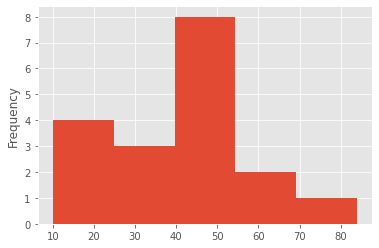

In [12]:
df_poc_AAB_day_week['counter'].plot.hist(bins=5)
plt.show()

### Verteilungssuche von Steinschlag

In [13]:
# returns a list with distribution name, parameters, pdf and cdf
def get_best_fit_distribution(data, size_for_cdf, preferred_distributions = True):
    
    y, x = np.histogram(data, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    x2 = np.arange(size_for_cdf) # for a better graph a bigger nummber of x-values is needed
        
    preferred_distribution_names = ['expon', 'gamma', 'lognorm', 'norm']
    possible_distribution_names = ['beta', 'cauchy', 'chi2', 'expon', 'f', 'gamma', 'logistic', 'lognorm',
                                   'norm', 'pareto', 't', 'uniform']
    
    # holders for best values
    best_distribution = None
    best_parameters = None
    best_sse = np.inf
    
    if preferred_distributions:
        for distribution_name in preferred_distribution_names:
            distribution = getattr(scipy.stats, distribution_name)
            parameters = distribution.fit(data)
            pdf = distribution.pdf(x, *parameters[:-2], loc=parameters[-2], scale=parameters[-1])
            sse = np.sum(np.power(y - pdf, 2.0))
            
            
            # distribution test
            if best_sse > sse > 0:
                best_distribution = distribution_name
                best_parameters = parameters
                best_sse = sse
                
    else:
        for distribution_name in possible_distribution_names:
            distribution = getattr(scipy.stats, distribution_name)
            parameters = distribution.fit(data)
            pdf = distribution.pdf(x, *parameters[:-2], loc=parameters[-2], scale=parameters[-1])
            sse = np.sum(np.power(y - pdf, 2.0))
            
            # distribution test
            if best_sse > sse > 0:
                best_distribution = distribution_name
                best_parameters = parameters
                best_sse = sse
    
    best_pdf = getattr(scipy.stats, best_distribution).pdf(x2, *best_parameters[:-2], loc = best_parameters[-2], scale = best_parameters[-1])
    best_cdf = getattr(scipy.stats, best_distribution).cdf(x2, *best_parameters[:-2], loc = best_parameters[-2], scale = best_parameters[-1])
    
    results = [best_distribution, best_parameters, best_pdf, best_cdf]
    
    return(results)

In [14]:
#scipy.stats.poisson.fit()
#scipy.stats.gamme.fit()

In [15]:
# return empirical distribution function
def get_edf(data):
    edf_x = np.sort(data)
    edf_y = np.arange(1, len(data) + 1) / len(data)
    return(edf_x, edf_y)

In [16]:
def plot_results(edf_x, edf_y, results, xlabel, title):
    plt.plot(results[-1], label = results[0] + " ecdf")
    plt.plot(edf_x, edf_y , label = 'edf')
    plt.xlabel(xlabel)
    plt.ylabel("P(X<x)")
    plt.title(title)
    plt.legend(loc = 'lower right')
    plt.show()

### Beste Verteilung suchen
#### Arbeitswoche

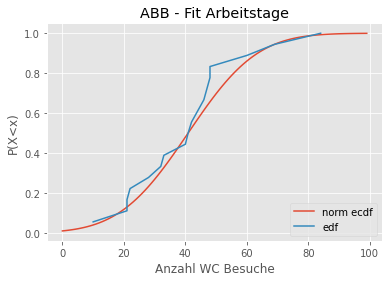

In [17]:
result_best_fit_week = get_best_fit_distribution(df_poc_AAB_day_week['counter'], 100, preferred_distributions = True)
#result_best_fit
edf_x_week, edf_y_week = get_edf(df_poc_AAB_day_week['counter'])
plot_results(edf_x_week, edf_y_week, result_best_fit_week, 'Anzahl WC Besuche', 'ABB - Fit Arbeitstage')
#plt.savefig('./Jupyter Notebook Grafiken/ABB - Fit Arbeitstage.png')

#### Wochenende

C:\Users\manue\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\manue\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


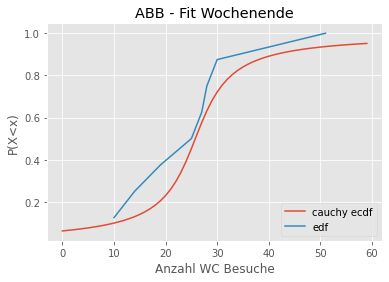

In [18]:
result_best_fit_weekend = get_best_fit_distribution(df_poc_AAB_day_weekend['counter'], 60, preferred_distributions = False)
#result_best_fit
edf_x_weekend, edf_y_weekend = get_edf(df_poc_AAB_day_weekend['counter'])
plot_results(edf_x_weekend, edf_y_weekend, result_best_fit_weekend, 'Anzahl WC Besuche', 'ABB - Fit Wochenende')

#### Simulation

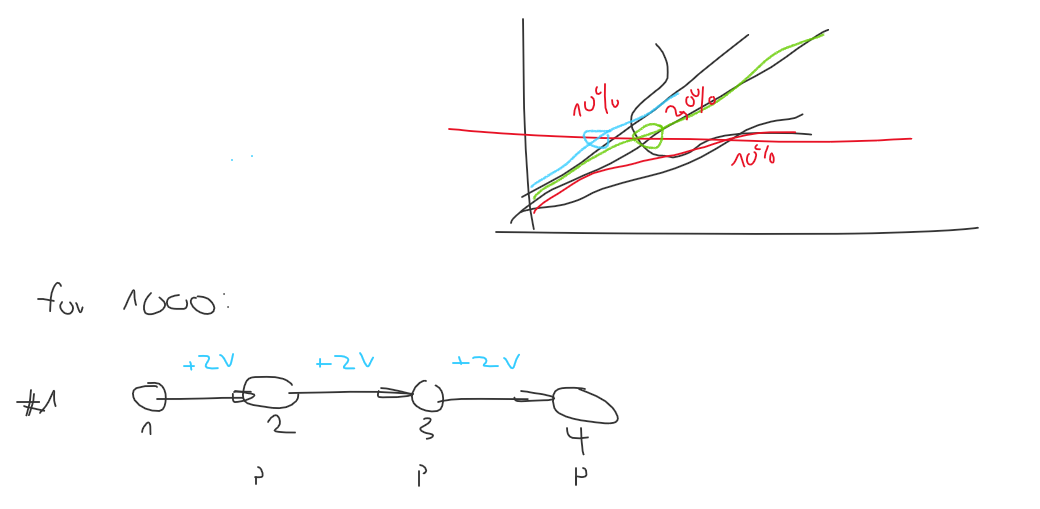

[numpy.random.standard_t](https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_t.html)  
[numpy.random.poisson](https://jiffyclub.github.io/numpy/reference/generated/numpy.random.poisson.html#numpy.random.poisson)

In [19]:
# Zufalllsvariable um den counter.mean() herum
Zufallsvariabel = np.random.poisson(df_poc_AAB_day_week['counter'].mean())
Zufallsvariabel

38

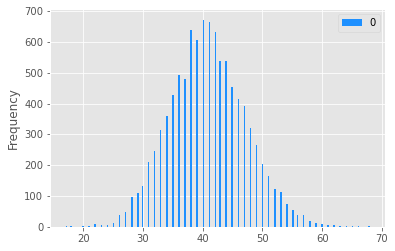

In [20]:
# 10000 Zufalllsvariable um den counter.mean() herum
Zufallsvariabel = np.random.poisson(df_poc_AAB_day_week['counter'].mean(), 10000)
Zufallsvariabel = pd.DataFrame(Zufallsvariabel)
Zufallsvariabel.plot.hist(bins=200, color='dodgerblue')
plt.show()

In [21]:
def create_zv_tage(n_tage, n_start=0):
    '''
    Funktion um Zufallsvaribale aus einer verteilung zu ziehen, aufsummieren durch 
    Anzahl n_tage.
    n_Tage: Wie viele Tage soll Zufallsvariable mit Poisson Verteilung aufsummiert werden
    n_start: Startwert WC Benutzung
    '''
    Zufallsvariabel = n_start
    list_tages_zv = []
    
    for day in range(n_tage):
        Zufallsvariabel += np.random.poisson(df_poc_AAB_day_week['counter'].mean())
        list_tages_zv.append(Zufallsvariabel)
        
    anzahl_nutzunge = Zufallsvariabel
    return list_tages_zv

print('Anzahl Nutzungen nach n Tage: ')
create_zv_tage(n_tage=4, n_start=20)

Anzahl Nutzungen nach n Tage: 


[63, 94, 144, 174]

In [22]:
# Erstelle Datafram mit aufsummierten Zufallsvariablen
def sim_p_voll(n_tage, n_start=0, n_sim=10):
    '''
    Erstellt ein DF mit dim n_sim x n_tage. Füllt DF mit Zufallsvariablen
    n_Tage: Wie viele Tage soll Zufallsvariable mit Poisson Verteilung aufsummiert werden
    n_start: Start wert Anzahl Nutzungen
    n_sim: Anzahl Simulationen die ausgeführt werden sollen
    '''
    # erstelle 0- Dataframe mit n_tage (Vorhersage) als Spalten
    df_sim = pd.DataFrame(0, index=np.arange(n_sim), columns=np.arange(1, n_tage+1))
    
    # Simulationsversuche als Zeilen schreiben
    for sim in range(n_sim):
        
        one_sim_zv = create_zv_tage(n_tage, n_start=0)
        
        # schreibe Werte für Spalten -> Ein druchgang mit ZV zeihen
        for day in range(len(df_sim.columns)):
            df_sim.iloc[sim][day+1] = one_sim_zv[day]
          
    return df_sim

%time df_sim_p_voll = sim_p_voll(n_tage=4, n_start=0, n_sim=10000)
df_sim_p_voll.head(10)

Wall time: 4.54 s


,1,2,3,4
0,46,90,136,174
1,43,76,120,163
2,41,81,119,173
3,48,98,129,179
4,34,63,108,134
5,37,67,107,151
6,30,65,114,155
7,46,83,128,178
8,33,68,105,155
9,45,68,113,158


#### Grafische Darstellung

einzelne möglich Schritte plotten und verschiedene Farben verwenden

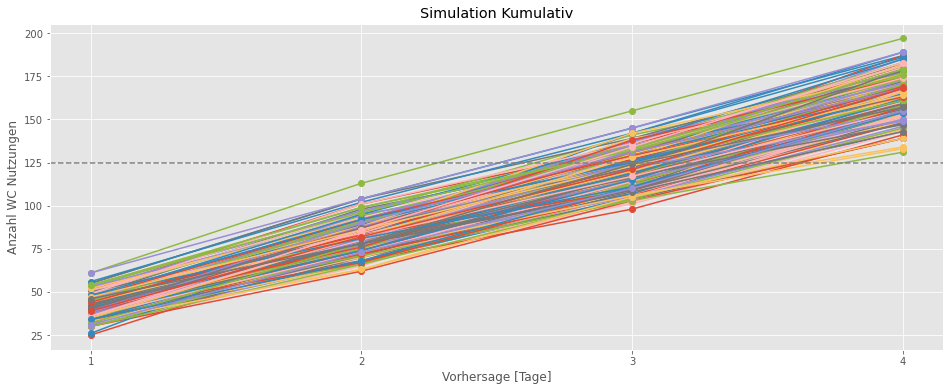

In [23]:
# Plot 200 Simulationen
anzahl_sim = 200
n_tage = 4

plt.figure(figsize=(16,6))
for sim in range(anzahl_sim):
    plt.plot(df_sim_p_voll.iloc[sim], marker='o', label=sim)
plt.xticks(np.arange(n_tage)+1)
plt.axhline(125, color='gray', linestyle='--')
plt.title('Simulation Kumulativ')
plt.xlabel('Vorhersage [Tage]')
plt.ylabel('Anzahl WC Nutzungen')
#plt.ylim(30, 300)
#plt.ylim(100, 150)
plt.show()

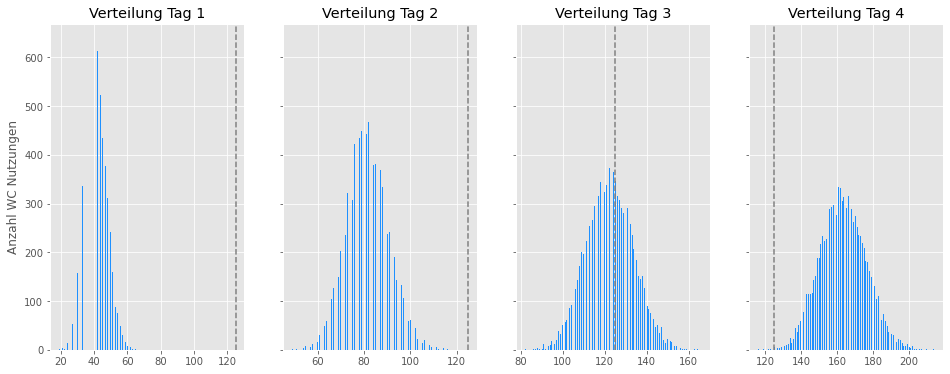

In [24]:
# Wahrscheinlichkeiten bis voll Grafische Darstellen (Einfacheres Verstädniss)
voll_grenze = 125

fig, ax = plt.subplots(1,4, figsize=(16,6), sharey=True)


for chart_pos in range(len(ax)):
    ax[chart_pos].hist(df_sim_p_voll[chart_pos+1], bins=200, color='dodgerblue')
    ax[chart_pos].axvline(125, color='gray', linestyle='--')
    ax[chart_pos].set_title('Verteilung Tag {}'.format(chart_pos+1))
        
ax[0].set_ylabel('Anzahl WC Nutzungen')
plt.show()
    

[0.0, 0.0, 0.419, 0.9994]


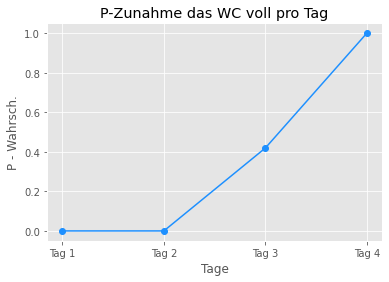

In [25]:
# Wahrscheinlichkeiten bis voll Grafische Darstellen
voll_grenze = 125

p_tage = []

for day in df_sim_p_voll.columns:
    
    # Anzahl Simulations Wert über dem Grenzwert / Gesamt Anzahl 
    sim_über_Grenze = df_sim_p_voll[df_sim_p_voll[day]>= voll_grenze]                                    
    p_voll = len(sim_über_Grenze) / len(df_sim_p_voll)
    
    # tages Wahrscheinlichkeit speichern
    p_tage.append(p_voll)
    
print(p_tage)    

xlabel = ['Tag 1', 'Tag 2', 'Tag 3', 'Tag 4']
plt.plot(p_tage, color='dodgerblue', marker='o')
plt.title('P-Zunahme das WC voll pro Tag')
plt.xlabel('Tage')
plt.xticks([0,1,2,3], xlabel)
plt.ylabel('P - Wahrsch.')
plt.show()

## Zusammenfassen Funktionen + Grafik

create_zv_tage Funktion erweitern sodass Verteilungen nach Wochentagen unterschieden wird. -> Aktueller tage (heute) lesen und if mit Folge tag

In [26]:
def create_zv_tage(n_tage, n_start=0):
    '''
    Funktion um Zufallsvaribale aus einer verteilung zu ziehen, aufsummieren durch 
    Anzahl n_tage.
    n_Tage: Wie viele Tage soll Zufallsvariable mit Poisson Verteilung aufsummiert werden
    n_start: Startwert WC Benutzung
    '''
    Zufallsvariabel = n_start
    list_tages_zv = []
    
    for day in range(n_tage):
        Zufallsvariabel += np.random.poisson(df_poc_AAB_day_week['counter'].mean())
        list_tages_zv.append(Zufallsvariabel)
        
    anzahl_nutzunge = Zufallsvariabel
    return list_tages_zv

print('Anzahl Nutzungen nach n Tage: ')
create_zv_tage(n_tage=4, n_start=20)

Anzahl Nutzungen nach n Tage: 


[51, 93, 133, 170]

Cool wäre X-Achsen Beschriftung als Folgetage: Heute = Donnerstag -> Vorhersagen über Freitag, Samstag, Sonntag

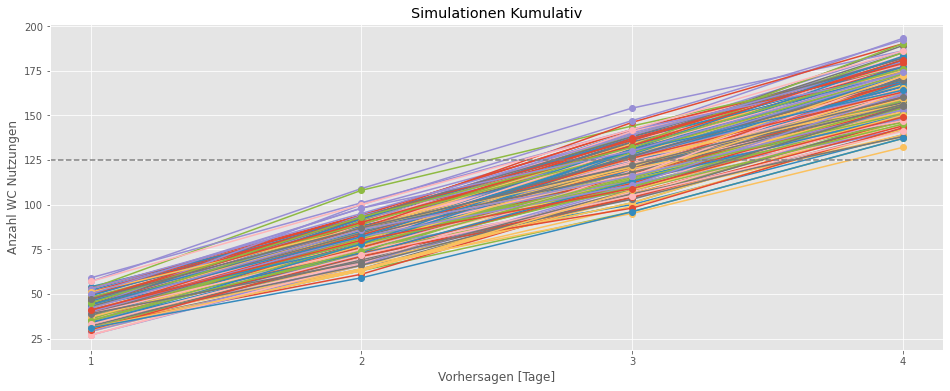

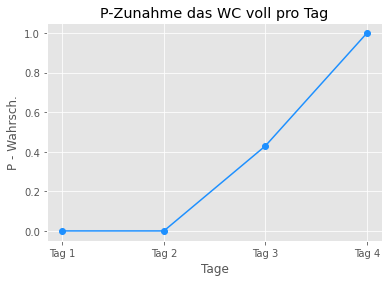

Wall time: 5.21 s


In [27]:
# Erstelle Datafram mit aufsummierten Zufallsvariablen
def sim_p_voll(n_tage, n_start=0, n_sim=10, n_grenzwert=125, ):
    '''
    Erstellt ein DF mit dim n_sim x n_tage. Füllt DF mit Zufallsvariablen
    n_Tage: Wie viele Tage soll Zufallsvariable mit Poisson Verteilung aufsummiert werden
    n_start: Start wert Anzahl Nutzungen
    n_sim: Anzahl Simulationen die ausgeführt werden sollen
    '''
    
    # erstelle 0- Dataframe mit n_tage (Vorhersage) als Spalten
    df_sim = pd.DataFrame(0, index=np.arange(n_sim), columns=np.arange(1, n_tage+1))
    
    # Simulationsversuche in Zeilen schreiben
    for sim in range(n_sim): 
        # Erstelle n Zufallsvariabelen für n_tage
        one_sim_zv = create_zv_tage(n_tage, n_start=0)
        
        # schreibe Werte in Spalten -> Ein druchgang mit ZV zeihen
        for day in range(len(df_sim.columns)):
            df_sim.iloc[sim][day+1] = one_sim_zv[day]
            
            
    ############### Grafiken ##############
    # ------------- Linechart -------------  
    anzahl_sim = 200    # Plot 200 Simulationen
    plt.figure(figsize=(16,6))
    
    for sim in range(anzahl_sim):
        plt.plot(df_sim.iloc[sim], marker='o', label=sim)
        
    plt.xticks(np.arange(n_tage)+1)
    plt.axhline(125, color='gray', linestyle='--')
    #plt.ylim(30, 300)
    #plt.ylim(100, 150)
    plt.title('Simulationen Kumulativ')
    plt.xlabel('Vorhersagen [Tage]')
    plt.ylabel('Anzahl WC Nutzungen')
    plt.savefig('./Jupyter Notebook Grafiken/Simulations Entwicklung.png')
    plt.show()
    # --------------------------------------    
    # ------------ P-Chart -----------------
    p_tage = []
    #plt.figure(figsize=(16,6))
    for day in df_sim.columns:
        # Anzahl Simulations Wert über dem Grenzwert / Gesamt Anzahl 
        sim_über_Grenze = df_sim[df_sim[day]>= n_grenzwert]                                    
        p_voll = len(sim_über_Grenze) / len(df_sim)

        # tages Wahrscheinlichkeit speichern
        p_tage.append(p_voll)

    #print(p_tage)    

    xlabel = ['Tag 1', 'Tag 2', 'Tag 3', 'Tag 4']
    plt.plot(p_tage, color='dodgerblue', marker='o')
    plt.title('P-Zunahme das WC voll pro Tag')
    plt.xlabel('Tage')
    plt.xticks([0,1,2,3], xlabel)
    plt.ylabel('P - Wahrsch.')
    plt.savefig('./Jupyter Notebook Grafiken/Simulation Vorhersage.png')
    plt.show()
    # ---------------------------------------

    return df_sim  #, fig1, fig2

%time df_sim_p_voll = sim_p_voll(n_tage=4, n_start=0, n_sim=10000)